# Jet Analysis

## Preparations
Please set path of jet data files for both pp and PbPb.
Also if you use jet cone size different from $R=0.4$, please change the value jetR below.

In [98]:
# Set File Paths
# Please set the path for pp jet data file
file_pp = '../data/jet_pp.dat'

# Please set the path for pbpb jet data file
file_pbpb = '../data/jet_pbpb.dat'

# Please set the value of jet cone size you used in the jet reconstruction
jetR = 0.4

# Number of hard scattering events generated by JETSCAPE
n_ev_pp = 250
n_ev_pbpb = 250

In [99]:
# preperations
import numpy as np
import matplotlib.pyplot as plt

# pi and 2pi coppied from FastJet
twopi = 6.283185307179586476925286766559005768394
pi = 0.5*twopi

# define plot style
width = 0.05
plotMarkerSize = 8
labelfontsize = 15
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [6., 4.5]
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['xtick.minor.width'] = 0.8
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['xtick.direction'] = "in"
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.labelsize'] = 15
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 0.8
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.direction'] = "in"
mpl.rcParams['legend.fontsize'] = 15
mpl.rcParams['legend.numpoints'] = 1
mpl.rcParams['font.size'] = 15
mpl.rcParams['savefig.format'] = "pdf"

In [100]:
def ratio_error(v1,e1,v2,e2):
  #v1, e1: numerator value and error
  #v2, e2: denominator value and error  
  error1 = e1/v2
  error2 = (e2/v2)*(v1/v2)
  error = np.sqrt(error1*error1+error2*error2)
  return error

In [101]:
# Load files
data_pp = np.loadtxt(file_pp, delimiter=',')
data_pbpb = np.loadtxt(file_pbpb, delimiter=',')

# Indices of the data array
i_pp = data_pp[:,0] 
i_pbpb = data_pbpb[:,0] 

# Get Indices of jets in the data array
jet_id_pp = np.where(i_pp < 0.1)
jet_id_pbpb = np.where(i_pbpb < 0.1)

# Extract jets
jets_pp = data_pp[jet_id_pp]
jets_pbpb = data_pbpb[jet_id_pbpb]

# Extract associated charged particles for pp
assoc_pp= []
for i in range(len(jet_id_pp[0])-1):
  chunck = data_pp[jet_id_pp[0][i]+1:jet_id_pp[0][i+1]]
  assoc_pp.append(chunck)
chunck = data_pp[jet_id_pp[0][-1]+1:]
assoc_pp.append(chunck)

# Extract associated charged particles for pbpb
assoc_pbpb= []
for i in range(len(jet_id_pbpb[0])-1):
  chunck = data_pbpb[jet_id_pbpb[0][i]+1:jet_id_pbpb[0][i+1]]
  assoc_pbpb.append(chunck)
chunck = data_pbpb[jet_id_pbpb[0][-1]+1:]
assoc_pbpb.append(chunck)

## Jet Spectrum
Here we calculate jet spectrum and generate a plot.
The jet spectrum here will be calculated as
$$\frac{1}{N_{\mathrm{ev}}}\frac{dN_{\mathrm{jet}}}{dp^{\mathrm{jet}}_{{\mathrm{T}}}}$$
Here $N_{\mathrm{ev}}$ is the number of hard scatterings (of $100<\hat{p}_{\mathrm{T}}<160$ GeV), $N_{\mathrm{jet}}$ is the total number of jets, and $p^{\mathrm{jet}}_{{\mathrm{T}}}$ is the jet transverse momentum.

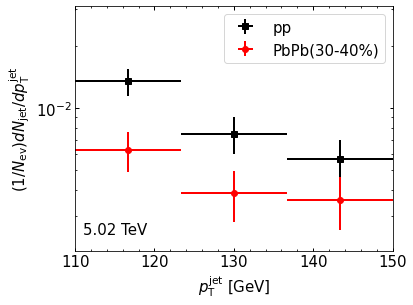

In [102]:
# Prepare arrays of Jet-pT
jet_pt_pp_in = jets_pp[:,1]
jet_pt_pbpb_in = jets_pbpb[:,1]

# bin settings
pt_min = 110
pt_max = 150
pt_bins = np.linspace(pt_min, pt_max,4)

# Fill Histogram
n_pp, pt = np.histogram(jet_pt_pp_in, bins=pt_bins )
n_pbpb, pt = np.histogram(jet_pt_pbpb_in, bins=pt_bins )

# Statistical Errors
err_n_pp = np.sqrt(n_pp)
err_n_pbpb = np.sqrt(n_pbpb)

# bin width
dpt = (pt[1:]-pt[:-1])
# bin center
pt = pt[0:-1] + 0.5*dpt

# Jet Spectrum 
dn_dpt_pp = n_pp/n_ev_pp/dpt
dn_dpt_pbpb = n_pbpb/n_ev_pbpb/dpt

# Errors 
err_dn_dpt_pp = err_n_pp/n_ev_pp/dpt
err_dn_dpt_pbpb = err_n_pbpb/n_ev_pbpb/dpt

# Generate Plots
fig = plt.figure()

plt.errorbar(pt, dn_dpt_pp, fmt='s', label="pp",
             xerr=0.5*dpt, yerr=err_dn_dpt_pp, color='black')

plt.errorbar(pt, dn_dpt_pbpb, fmt='o', label="PbPb(30-40%)",
             xerr=0.5*dpt, yerr=err_dn_dpt_pbpb, color='red')

#axes setting
plt.yscale('log')
plt.legend(loc=0)
plt.xlabel(r"$p^{\mathrm{jet}}_{\mathrm{T}}$ [GeV]")
plt.ylabel(r"$(1/N_{\mathrm{ev}})dN_{\mathrm{jet}}/dp^{\mathrm{jet}}_{\mathrm{T}}$")
plt.xlim(pt_min,pt_max)
y_min = (dn_dpt_pbpb[-1]-err_dn_dpt_pbpb[-1])*0.8
y_max = (dn_dpt_pp[0]+err_dn_dpt_pp[0])*2.0
plt.ylim(y_min,y_max)
plt.text(pt_min+1,y_min*1.2, '5.02 TeV')

# save plots
plt.tight_layout()
plt.savefig('n_jet')

## Jet-$R_{\mathrm{AA}}$

Then, let's calculate Jet-$R_{\mathrm{AA}}$ and see the jet energy loss. 
Jet-$R_{\mathrm{AA}}$ can be calculated as
$$
R^{\mathrm{jet}}_{\mathrm{AA}} = 
\frac{
\left.
\frac{1}{N_{\mathrm{ev}}}\frac{dN_{\mathrm{jet}}}{dp^{\mathrm{jet}}_{{\mathrm{T}}}}
\right|_{\mathrm{PbPb}}
}
{
\left.
\frac{1}{N_{\mathrm{ev}}}\frac{dN_{\mathrm{jet}}}{dp^{\mathrm{jet}}_{{\mathrm{T}}}}
\right|_{pp}
}
$$

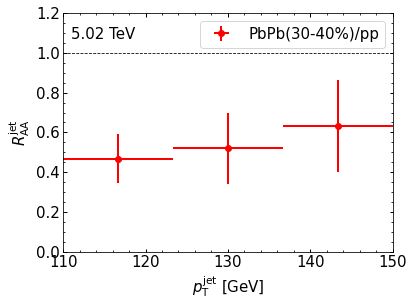

In [103]:
# Generate Plots
fig = plt.figure()

# Calculate RAA and error
raa =  dn_dpt_pbpb/dn_dpt_pp
error_raa = ratio_error(dn_dpt_pbpb,err_dn_dpt_pbpb,dn_dpt_pp,err_dn_dpt_pp)

plt.errorbar(pt, raa, fmt='o', label="PbPb(30-40%)/pp",
             xerr=0.5*dpt, yerr=error_raa, color='red')


#axes setting
plt.legend(loc=0)
plt.xlabel(r"$p^{\mathrm{jet}}_{\mathrm{T}}$ [GeV]")
plt.ylabel(r"$R^{\mathrm{jet}}_{\mathrm{AA}}$")
plt.xlim(pt_min,pt_max)
plt.ylim(0.0,1.2)
plt.legend(loc=0)
plt.text(pt_min+1,1.07, '5.02 TeV')
plt.axhline(1, color = "black", linestyle="dashed", linewidth=0.8) 

# save plot to the Desktop
plt.tight_layout()
plt.savefig('raa')

## Jet Fragmentation Function

Next, let's see the momentum distribution of charged particles inside jets by calculating jet fragmentation function.
The fragmentation function is calculated as
$$
D(z) = \frac{1}{N_{\mathrm{jet}}} \frac{dN_{\mathrm{ch}}}{dz}
$$
where 
$N_{\mathrm{ch}}$ is the number of charged particles inside jets 
and 
$z=\frac{p^{\mathrm{ch}}_{\mathrm{T}}}{p^{\mathrm{jet}}_{\mathrm{T}}}$ is the transverse momentum fraction between the charged particle and the jet.

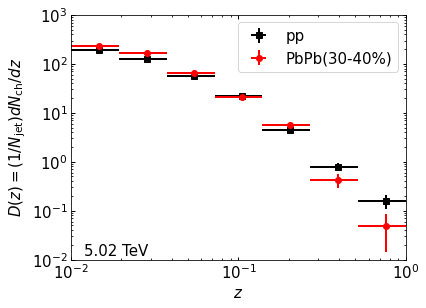

In [104]:
# Number of jets

n_jet_pp = len(jets_pp)
n_jet_pbpb = len(jets_pbpb)

# prepare arrays for z = pT_assoc/pTjet
z_pp_in = []
z_pbpb_in = []

# prepare arrays for associated's status
status_pp = []
status_pbpb = []

# z for pp
for i in range(n_jet_pp):
  pt_jet = jets_pp[i,1] #jet-pt in pp
  for assoc in assoc_pp[i]:
    pt_assoc = assoc[1]
    z = pt_assoc/pt_jet
    z_pp_in.append(z)

    status = assoc[4]
    if not status < 0:
      status = 1
    status_pp.append(status)

# z for pbpb
for i in range(n_jet_pbpb):
  pt_jet = jets_pbpb[i,1] #jet-pt in PbPb
  for assoc in assoc_pbpb[i]:
    pt_assoc = assoc[1]
    z = pt_assoc/pt_jet
    z_pbpb_in.append(z)

    status = assoc[4]
    if not status < 0:
      status = 1
    status_pbpb.append(status)


# Set Histogram bins
ex = np.linspace(-2, 0, 8)
z_bins = np.power(10,ex)

# Fill Histograms
n_pp, z = np.histogram(z_pp_in, bins=z_bins, weights = status_pp )
n_pbpb, z = np.histogram(z_pbpb_in, bins=z_bins, weights = status_pbpb )


# Statistical Errors
err_n_pp = np.sqrt(n_pp)
err_n_pbpb = np.sqrt(n_pbpb)

# bin width
dz = (z[1:]-z[:-1])
# bin center
z = z[0:-1] + 0.5*dz

# z-distribution
dn_dz_pp = n_pp/dz/n_jet_pp
dn_dz_pbpb = n_pbpb/dz/n_jet_pbpb

# Errors 
err_dn_dz_pp = err_n_pp/dz/n_jet_pp
err_dn_dz_pbpb = err_n_pbpb/dz/n_jet_pbpb

# Generate Plots
fig = plt.figure()

plt.errorbar(z, dn_dz_pp, fmt='s', label="pp",
             xerr=0.5*dz, yerr=err_dn_dz_pp, color='black')
plt.errorbar(z, dn_dz_pbpb, fmt='o', label="PbPb(30-40%)",
             xerr=0.5*dz, yerr=err_dn_dz_pbpb, color='red')


#axes setting
plt.xscale('log')
plt.yscale('log')
plt.legend(loc=0)
plt.xlabel(r"$z$")
plt.ylabel(r"$D(z)=(1/N_{\mathrm{jet}})dN_{\mathrm{ch}}/dz}_{\mathrm{T}}$")
plt.xlim(z_bins[0],z_bins[-1])
y_min = 0.01
y_max = 1000
plt.ylim(y_min,y_max)
plt.text(0.012,y_min*1.2, '5.02 TeV')

# save plot to the Desktop
#plt.tight_layout()
plt.savefig('jet_ff')


Then, calculate the ratio of $D(z)$ between PbPb and $pp$

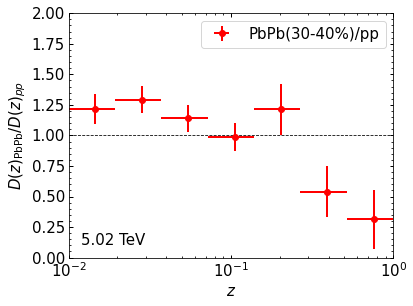

In [105]:
# Generate Plots
fig = plt.figure()

# Calculate RAA and error
raa =  dn_dz_pbpb/dn_dz_pp
error_raa = ratio_error(dn_dz_pbpb,err_dn_dz_pbpb,dn_dz_pp,err_dn_dz_pp)


plt.errorbar(z, raa, fmt='o', label="PbPb(30-40%)/pp",
             xerr=0.5*dz, yerr=error_raa, color='red')


#axes setting
plt.legend(loc=0)
plt.xlabel(r"$z$")
plt.ylabel(r"$D(z)_{\mathrm{PbPb}}/D(z)_{pp}}$")
plt.xlim(z_bins[0],z_bins[-1])
plt.ylim(0.0,2.0)
plt.legend(loc=0)
plt.text(0.012,0.1, '5.02 TeV')
plt.xscale('log')

plt.axhline(1, color = "black", linestyle="dashed", linewidth=0.8) 

# save plot to the Desktop
plt.tight_layout()
plt.savefig('ratio_jet_ff')

## Jet Shape

Next, let's see the radial distribution of the charged particles' $p_{\mathrm{T}}$ inside jets by calculating jet shape function.
The jet shape function is calculated as
$$
P(\Delta r) = \frac{1}{N_{\mathrm{jet}}} \frac{d\sum_{i} p^{i}_{\mathrm{T}} }{d\Delta r}
$$
where 
$p^{i}_{\mathrm{T}}$ is the transverse momentum of each charged particle 
and 
$\Delta r = \sqrt{(\eta - \eta_{\mathrm{jet}})^2+(\phi - \phi_{\mathrm{jet}})^2}$ is the radial distance from the jet center.



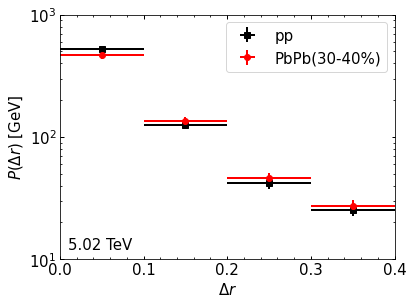

In [106]:
# Number of jets
n_jet_pp = len(jets_pp)
n_jet_pbpb = len(jets_pbpb)

# prepare arrays for delta_r = sqrt(delta_eta^2 + delta_phi^2)
dr_pp_in = []
dr_pbpb_in = []

# prepare arrays for pT_assoc
pt_pp = []
pt_pbpb = []

# Function to calculate delta_phi in [-pi,pi]
def delta_phi(phi_1, phi_2):
  dphi = phi_1 - phi_2
  if dphi >  pi: 
    dphi = dphi - twopi
  if dphi < -pi: 
    dphi = dphi + twopi
  return dphi;
  
#For pp
for i in range(n_jet_pp):
  eta_jet = jets_pp[i,2]
  phi_jet = jets_pp[i,3]  
  for assoc in assoc_pp[i]:

    eta_assoc = assoc[2]
    phi_assoc = assoc[3] 
    deta = eta_assoc - eta_jet
    dphi = delta_phi(phi_assoc, phi_jet)
    dr = np.sqrt(deta*deta + dphi*dphi)
    dr_pp_in.append(dr)

    pt_assoc = assoc[1]
    pt_pp.append(pt_assoc)

#For pbpb
for i in range(n_jet_pbpb):
  eta_jet = jets_pbpb[i,2]
  phi_jet = jets_pbpb[i,3]  
  for assoc in assoc_pbpb[i]:

    eta_assoc = assoc[2]
    phi_assoc = assoc[3] 
    deta = eta_assoc - eta_jet
    dphi = delta_phi(phi_assoc, phi_jet)
    dr = np.sqrt(deta*deta + dphi*dphi)
    dr_pbpb_in.append(dr)

    pt_assoc = assoc[1]
    status = assoc[4]
    if status < 0:
      pt_assoc = - pt_assoc
    pt_pbpb.append(pt_assoc)

# Set Histogram bins
r_bins = np.linspace(0, jetR, (int(jetR/0.1)+1))

# Fill Histograms
js_pp, r = np.histogram(dr_pp_in, bins=r_bins, weights=pt_pp )
js_pbpb, r = np.histogram(dr_pbpb_in, bins=r_bins, weights=pt_pbpb )

# Fill Histograms for error
w2_pp = np.array(pt_pp)*np.array(pt_pp)
e2_js_pp, r = np.histogram(dr_pp_in, bins=r_bins, weights=w2_pp )
w2_pbpb = np.array(pt_pbpb)*np.array(pt_pbpb)
e2_js_pbpb, r = np.histogram(dr_pbpb_in, bins=r_bins, weights=w2_pbpb )


# bin width
dr = (r[1:]-r[:-1])
# bin center
r = r[0:-1] + 0.5*dr

# derivative and division
js_pp = js_pp/dr/n_jet_pp
js_pbpb = js_pbpb/dr/n_jet_pbpb

# derivative and division (error)
err_js_pp = np.sqrt(e2_js_pp)/dr/n_jet_pp
err_js_pbpb = np.sqrt(e2_js_pbpb)/dr/n_jet_pbpb


# # Generate Plots
fig = plt.figure()
plt.errorbar(r, js_pp, fmt='s', label="pp", xerr=0.5*dr, yerr=err_js_pp, color='black')
plt.errorbar(r, js_pbpb, fmt='o', label="PbPb(30-40%)", xerr=0.5*dr, yerr=err_js_pbpb, color='red')

# #axes setting
plt.yscale('log')
plt.legend(loc=0)
plt.xlabel(r"$\Delta r$")
plt.ylabel(r"$P(\Delta r)$ [GeV]")
plt.xlim(0,jetR)
y_min = 10
y_max = 1000
plt.ylim(y_min,y_max)
plt.text(0.01,y_min*1.2, '5.02 TeV')

# # save plot to the Desktop
# #plt.tight_layout()
plt.savefig('jet_shape')


Then, calculate the ratio of $P(\Delta r)$ between PbPb and $pp$

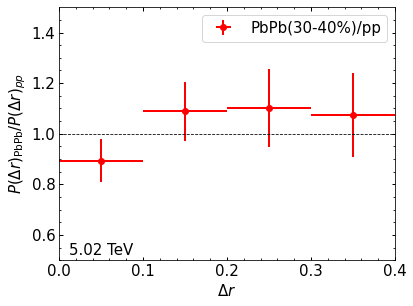

In [107]:
# Generate Plots
fig = plt.figure()

# Calculate RAA and error
raa =  js_pbpb/js_pp

error_raa = ratio_error(js_pbpb,err_js_pbpb,js_pp,err_js_pp)

plt.errorbar(r, raa, fmt='o', label="PbPb(30-40%)/pp",
             xerr=0.5*dr, yerr=error_raa, color='red')


#axes setting
plt.legend(loc=0)
plt.xlabel(r"$\Delta r$")
plt.ylabel(r"$P(\Delta r)_{\mathrm{PbPb}}/P(\Delta r)_{pp}}$")
plt.xlim(0.0,jetR)
plt.ylim(0.5,1.5)
plt.legend(loc=0)
plt.text(0.012,0.52, '5.02 TeV')


plt.axhline(1, color = "black", linestyle="dashed", linewidth=0.8) 

# save plot to the Desktop
plt.tight_layout()
plt.savefig('ratio_jet_shape')